In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [96]:
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)
tf.logging.set_verbosity(old_v)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
nodes1 = 500
nodes2 = 500
nodes3 = 500


classes = 10
batch_size = 100

x = tf.placeholder('float',[None,784])
y = tf.placeholder('float')

def neural_network_model(data):
  layer1 = {'weights':tf.Variable(tf.random_normal([784,nodes1])),
            'biases':tf.Variable(tf.random_normal([nodes1]))}
  layer2 = {'weights':tf.Variable(tf.random_normal([nodes1,nodes2])),
            'biases':tf.Variable(tf.random_normal([nodes2]))}
  layer3 = {'weights':tf.Variable(tf.random_normal([nodes2,nodes3])),
             'biases':tf.Variable(tf.random_normal([nodes3]))}
  layer_out = {'weights':tf.Variable(tf.random_normal([nodes3,classes])),
            'biases':tf.Variable(tf.random_normal([classes]))}
  
  l1 = tf.add(tf.matmul(data,layer1['weights']),layer1['biases'])
  l1 = tf.nn.relu(l1)
  
  l2 = tf.add(tf.matmul(l1,layer2['weights']),layer2['biases'])
  l2 = tf.nn.relu(l2)

  l3 = tf.add(tf.matmul(l2,layer3['weights']),layer3['biases'])
  l3 = tf.nn.relu(l3)
  
  l_out = tf.add(tf.matmul(l3,layer_out['weights']),layer_out['biases'])
  
  return l_out


  

In [0]:
def train_neural_network():
  prediction = neural_network_model(x)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = prediction,labels = y))
  optimizer = tf.train.AdamOptimizer().minimize(cost)
  
  n_epochs = 100
  
  with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    for epoch in range(n_epochs):
      epoch_loss =  0
      for _ in range(int(mnist.train.num_examples/batch_size)):
        train_data,train_labels = mnist.train.next_batch(batch_size)
        _, c  =  sess.run([optimizer,cost],  feed_dict = {x:train_data,y:train_labels})
        epoch_loss += c
      print('Epoch : ',epoch,'/',n_epochs,' loss : ',epoch_loss)
      
      
      
    correct = tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct,'float'))
    print('Accuracy : ',accuracy.eval({x:mnist.test.images,y: mnist.test.labels}))
    
  

In [99]:
train_neural_network()


Epoch :  0 / 100  loss :  1783988.7825622559
Epoch :  1 / 100  loss :  395791.8266906738
Epoch :  2 / 100  loss :  213471.24092197418
Epoch :  3 / 100  loss :  122430.53272074461
Epoch :  4 / 100  loss :  77312.19033966959
Epoch :  5 / 100  loss :  49003.83624732494
Epoch :  6 / 100  loss :  32047.24737302959
Epoch :  7 / 100  loss :  23262.02036897838
Epoch :  8 / 100  loss :  18421.741354377395
Epoch :  9 / 100  loss :  17946.54710168818
Epoch :  10 / 100  loss :  14426.04351978004
Epoch :  11 / 100  loss :  15681.57687667607
Epoch :  12 / 100  loss :  13666.02034540847
Epoch :  13 / 100  loss :  12055.056046076119
Epoch :  14 / 100  loss :  13523.956017792225
Epoch :  15 / 100  loss :  8299.216875374317
Epoch :  16 / 100  loss :  11918.977353283026
Epoch :  17 / 100  loss :  11795.969401677847
Epoch :  18 / 100  loss :  9722.174022640884
Epoch :  19 / 100  loss :  12402.610765611287
Epoch :  20 / 100  loss :  8755.044108331194
Epoch :  21 / 100  loss :  7214.9264414310455
Epoch :  2

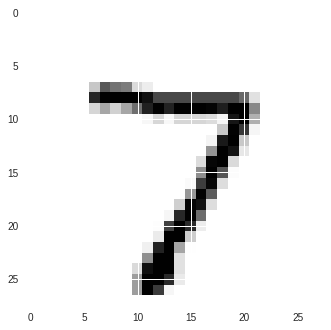

In [103]:
import matplotlib.pyplot as plt
plt.imshow(mnist.test.images[0].reshape(28,28))